In [1]:
import pandas as pd
import numpy as np


In [3]:
# A1. Data Exploration: Load the data available in “thyroid0387_UCI” worksheet.
data = pd.read_excel("C:\\Users\\91993\\Downloads\\19CSE305_LabData_Set3.1.xlsx", sheet_name="thyroid0387_UCI")


In [5]:
data

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,841031002,41,F,f,f,f,f,f,f,f,...,t,148,t,1.44,t,103,f,?,STMW,NO CONDITION
996,841031010,41,F,f,f,f,f,f,f,f,...,t,9.7,t,1.46,t,6.6,f,?,other,F
997,841031030,20,F,f,f,f,f,t,f,f,...,f,?,f,?,f,?,t,30,other,NO CONDITION
998,841031031,20,F,f,f,f,f,f,f,f,...,t,201,t,0.84,t,240,f,?,SVI,AK


In [11]:
# Study each attribute and associated values present. Identify the datatype (nominal etc.) 
# for the attribute.
data_types = data.dtypes

nominal_attributes = []
ordinal_attributes = []
numerical_attributes = []

for column in data.columns:
    if data[column].dtype == 'object' or data[column].dtype.name == 'category':
        nominal_attributes.append(column)
    elif data[column].dtype in ['int64', 'float64']:
        numerical_attributes.append(column)

print("Nominal Attributes:", nominal_attributes)
print("Numerical Attributes:", numerical_attributes)

one_hot_encoded_data = pd.get_dummies(data, columns=nominal_attributes)
print(one_hot_encoded_data)


Nominal Attributes: ['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source', 'Condition']
Numerical Attributes: ['Record ID', 'age']
     Record ID  age  sex_?  sex_F  sex_M  on thyroxine_f  on thyroxine_t  \
0    840801013   29      0      1      0               1               0   
1    840801014   29      0      1      0               1               0   
2    840801042   41      0      1      0               1               0   
3    840803046   36      0      1      0               1               0   
4    840803047   32      0      1      0               1               0   
..         ...  ...    ...    ...    ...             ...             ...   
995  8

In [7]:
# For categorical attributes, identify the encoding scheme to be employed. (Guidance:  employ label encoding for ordinal 
# variables while One-Hot encoding may be employed  for nominal variables)
from sklearn.preprocessing import LabelEncoder
encode = ['Record ID','age']

label_encoders = {}

for column in encode:
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])
    
data


,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,0,24,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,NO CONDITION
1,1,24,F,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,NO CONDITION
2,2,36,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,NO CONDITION
3,3,31,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,NO CONDITION
4,4,27,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,36,F,f,f,f,f,f,f,f,...,t,148,t,1.44,t,103,f,?,STMW,NO CONDITION
996,996,36,F,f,f,f,f,f,f,f,...,t,9.7,t,1.46,t,6.6,f,?,other,F
997,997,15,F,f,f,f,f,t,f,f,...,f,?,f,?,f,?,t,30,other,NO CONDITION
998,998,15,F,f,f,f,f,f,f,f,...,t,201,t,0.84,t,240,f,?,SVI,AK


In [8]:
# Study the data range for numeric variables.
numeric_columns = data.select_dtypes(include=['int64', 'float64'])


for column in numeric_columns.columns:
    min_value = numeric_columns[column].min()
    max_value = numeric_columns[column].max()
    print(f"{column}: Min = {min_value}, Max = {max_value}")

Record ID: Min = 0, Max = 999
age: Min = 0, Max = 86


In [9]:
# Study the presence of missing values in each attribute.
missing_values = data.isna()

missing_count = missing_values.sum()


print("Missing Values Count for Each Column:")
for column, count in missing_count.items():
    print(f"{column}: {count} missing values")

Missing Values Count for Each Column:
Record ID: 0 missing values
age: 0 missing values
sex: 0 missing values
on thyroxine: 0 missing values
query on thyroxine: 0 missing values
on antithyroid medication: 0 missing values
sick: 0 missing values
pregnant: 0 missing values
thyroid surgery: 0 missing values
I131 treatment: 0 missing values
query hypothyroid: 0 missing values
query hyperthyroid: 0 missing values
lithium: 0 missing values
goitre: 0 missing values
tumor: 0 missing values
hypopituitary: 0 missing values
psych: 0 missing values
TSH measured: 0 missing values
TSH: 0 missing values
T3 measured: 0 missing values
T3: 0 missing values
TT4 measured: 0 missing values
TT4: 0 missing values
T4U measured: 0 missing values
T4U: 0 missing values
FTI measured: 0 missing values
FTI: 0 missing values
TBG measured: 0 missing values
TBG: 0 missing values
referral source: 0 missing values
Condition: 0 missing values


Outliers in Record ID:
Series([], Name: Record ID, dtype: int64)


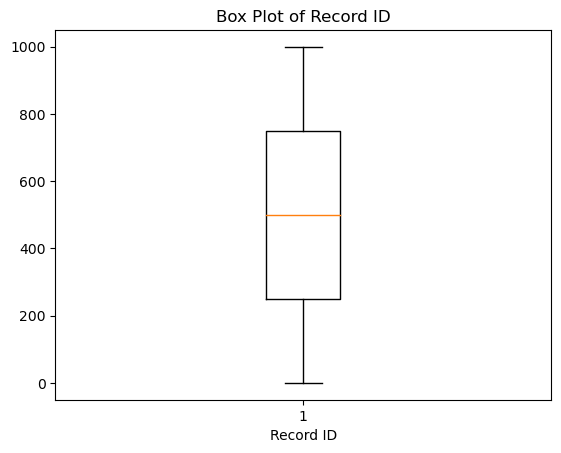

Outliers in age:
Series([], Name: age, dtype: int64)


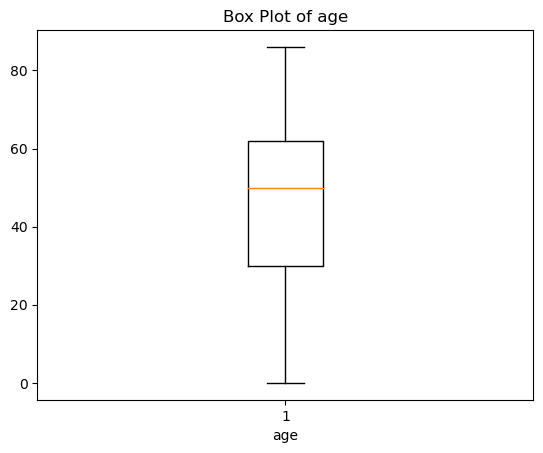

In [10]:
# Study presence of outliers in data. import matplotlib.pyplot as plt
from scipy import stats
numeric_columns = ['Record ID', 'age']  
for numeric_variable in numeric_columns:
    z_scores = stats.zscore(data[numeric_variable])
    abs_z_scores = abs(z_scores)

    
    threshold = 3

   
    outliers = (abs_z_scores > threshold)
    outlier_values = data[numeric_variable][outliers]
    print(f"Outliers in {numeric_variable}:")
    print(outlier_values)

   
    plt.boxplot(data[numeric_variable])
    plt.xlabel(numeric_variable)
    plt.title(f'Box Plot of {numeric_variable}')
    plt.show()

In [11]:
# For numeric variables, calculate the mean and variance (or standard deviation).

numeric_variables = ['Record ID', 'age'] 

for variable in numeric_variables:
    
    mean = data[variable].mean()
    
    
    variance = data[variable].var()
    
    
    std_deviation = data[variable].std()
    
   
    print(f"{variable}:")
    print(f"  Mean: {mean}")
    print(f"  Variance: {variance}")
    print(f"  Standard Deviation: {std_deviation}\n")


Record ID:
  Mean: 499.5
  Variance: 83416.66666666667
  Standard Deviation: 288.8194360957494

age:
  Mean: 46.503
  Variance: 350.50649749749806
  Standard Deviation: 18.721818755064852



In [12]:
# A2. Data Imputation: employ appropriate central tendencies to fill the missing values in the data 
# variables. Employ following guidance.
# • Mean may be used when the attribute is numeric with no outliers
# • Median may be employed for attributes which are numeric and contain outliers
# • Mode may be employed for categorical attributes
missing_values = data.isna()
numeric_with_outliers = ['Record ID', 'age'] 
numeric_no_outliers = ['Record ID', 'age'] 
categorical_columns = data.select_dtypes(include=['object', 'category'])
categorical_column_names = categorical_columns.columns.tolist()
print("Categorical Columns:")
print(categorical_column_names)
categorical_attributes = ['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source', 'Condition']  
for attribute in numeric_no_outliers:
    mean = data[attribute].mean()
    data[attribute].fillna(mean, inplace=True)

for attribute in numeric_with_outliers:
    median = data[attribute].median()
    data[attribute].fillna(median, inplace=True)

for attribute in categorical_attributes:
    mode = data[attribute].mode().iloc[0]
    data[attribute].fillna(mode, inplace=True)


remaining_missing = data.isna().sum()
print("Remaining Missing Values:")
print(remaining_missing)

Categorical Columns:
['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source', 'Condition']
Remaining Missing Values:
Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured               

In [13]:
# A3. Data Normalization / Scaling: from the data study, identify the attributes which may need 
# normalization. Employ appropriate normalization techniques to create normalized set of data
from sklearn.preprocessing import MinMaxScaler


numeric_columns = data.select_dtypes(include=['int64', 'float64'])


scaler = MinMaxScaler()

data[numeric_columns.columns] = scaler.fit_transform(data[numeric_columns.columns])


print("Normalized Dataset:")
print(data.head())


Normalized Dataset:
   Record ID       age sex on thyroxine query on thyroxine  \
0   0.000000  0.279070   F            f                  f   
1   0.001001  0.279070   F            f                  f   
2   0.002002  0.418605   F            f                  f   
3   0.003003  0.360465   F            f                  f   
4   0.004004  0.313953   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?            f   ?          

In [14]:
# A4. Similarity Measure: Take the first 2 observation vectors from the dataset. Consider only the 
# attributes (direct or derived) with binary values for these vectors (ignore other attributes). Calculate 
# the Jaccard Coefficient (JC) and Simple Matching Coefficient (SMC) between the document vectors. 
# Use first vector for each document for this. Compare the values for JC and SMC and judge the 
# appropriateness of each of them.
# JC = (f11) / (f01+ f10+ f11)
# SMC = (f11 + f00) / (f00 + f01 + f10 + f11)
# f11= number of attributes where the attribute carries value of 1 in both 
# the vectors.

binary_attributes = []


for column in data.columns:
    unique_values = data[column].unique()
    if len(unique_values) == 2 and set(unique_values) == {0, 1}:
        binary_attributes.append(column)


print("Binary Attributes:")
print(binary_attributes)




vector1 = data.iloc[0][binary_attributes].tolist()
vector2 = data.iloc[1][binary_attributes].tolist()


f11 = sum(x & y for x, y in zip(vector1, vector2))
f01 = sum(1 for x, y in zip(vector1, vector2) if x == 0 and y == 1)
f10 = sum(1 for x, y in zip(vector1, vector2) if x == 1 and y == 0)


if f01 + f10 + f11 == 0:
    jc = 0.0
else:
    jc = f11 / (f01 + f10 + f11)


smc_denominator = len(binary_attributes)
if smc_denominator == 0:
    smc = 0.0
else:
    smc = (f11 + sum(1 for x, y in zip(vector1, vector2) if x == y)) / smc_denominator


print("Jaccard Coefficient (JC):", jc)
print("Simple Matching Coefficient (SMC):", smc)

Binary Attributes:
[]
Jaccard Coefficient (JC): 0.0
Simple Matching Coefficient (SMC): 0.0


In [15]:
from sklearn.metrics.pairwise import cosine_similarity

feature_columns = data.columns[:-1]


df_encoded = pd.get_dummies(data, columns=feature_columns, drop_first=True)

vector1 = df_encoded.iloc[0, 1:].values  
vector2 = df_encoded.iloc[1, 1:].values  
vector1 = vector1.reshape(1, -1)
vector2 = vector2.reshape(1, -1)


cosine_sim = cosine_similarity(vector1, vector2)


print("Cosine Similarity:", cosine_sim[0, 0])


Cosine Similarity: 0.5853694070049635


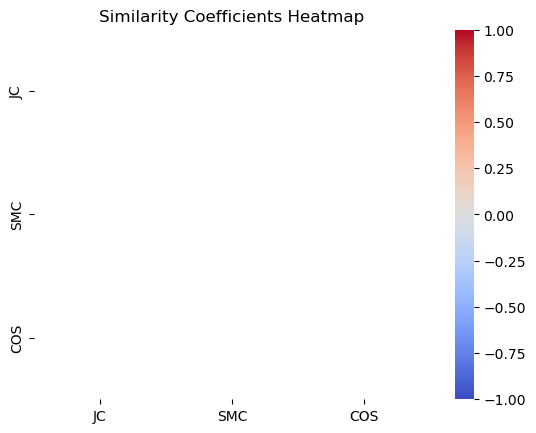

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
data = pd.read_excel("C:\\Users\\91993\\Downloads\\19CSE305_LabData_Set3.1.xlsx", sheet_name="thyroid0387_UCI")
first_20_vectors = data.iloc[:20, 1:]  


non_binary_values = {'T', 'F'}  
first_20_vectors = first_20_vectors.applymap(lambda x: x if x in non_binary_values else np.nan)
first_20_vectors = first_20_vectors.dropna()
jc_values = []
smc_values = []
cos_values = []

for i in range(len(first_20_vectors)):
    vector1 = first_20_vectors.iloc[i].tolist()
    for j in range(i + 1, len(first_20_vectors)):
        vector2 = first_20_vectors.iloc[j].tolist()

        
        f11 = sum(x & y for x, y in zip(vector1, vector2))
        f01 = sum(1 for x, y in zip(vector1, vector2) if x == 0 and y == 1)
        f10 = sum(1 for x, y in zip(vector1, vector2) if x == 1 and y == 0)

        
        if f01 + f10 + f11 == 0:
            jc = 0.0
        else:
            jc = f11 / (f01 + f10 + f11)
        smc_denominator = len(vector1)
        if smc_denominator == 0:
            smc = 0.0
        else:
            smc = (f11 + sum(1 for x, y in zip(vector1, vector2) if x == y)) / smc_denominator

        
        cos_sim = cosine_similarity([vector1], [vector2])[0, 0]

      
        jc_values.append(jc)
        smc_values.append(smc)
        cos_values.append(cos_sim)


coefficients_df = pd.DataFrame({'JC': jc_values, 'SMC': smc_values, 'COS': cos_values})


cmap = sns.color_palette("coolwarm", as_cmap=True)  
sns.heatmap(coefficients_df.corr(), annot=True, cmap=cmap, fmt=".2f", vmin=-1, vmax=1)
plt.title("Similarity Coefficients Heatmap")
plt.show()
